In [24]:
#! python3
import pandas as pd
import datetime as dt
import time
from psaw import PushshiftAPI
import datetime
from matplotlib import pyplot
import string
%matplotlib inline

In [33]:
#! python3
import pandas as pd
import datetime as dt
import time
from psaw import PushshiftAPI
import datetime

#Pushshift API to retrieve posts(submissions)
api = PushshiftAPI()

#submission ids will be stored in a set to retrieve their comments later
sub_ids = set()
comm_ids = set()

#Dictionary for submissions
sub_dict = {"author":[],#author
                "title":[],#title
                "score":[],#score
                "id":[],#id
                "full_link":[],#full_link
                "num_comments":[],#num_comments
                "created_utc":[],
                "selftext":[],#selftext
                "link_flair_text":[]#link_flair_text
                  }

#Dictionary for comments
comm_dict = {"author":[],#author
            "score":[],#score
            "id":[],#id
            "permalink":[],#permalink
             "link_id":[],#link_id
            "parent_id":[],#parent_id
            "created_utc":[],
            "body":[]#body
                  }

now = datetime.datetime.now()
print("Begin processing", str(now))

#Pull x amount of submissions from anxiety forum
gen = api.search_submissions(subreddit='Anxiety', limit=1000000)
for sub in gen:
    #if sub.d_["is_video"]==False and sub.d_["media_only"]==False:
    #save ID for comment search
    sub_ids.add(sub.id)
    #print(sub)
    #save submissions into dictionary
    try:
        sub_dict["author"].append(sub.author)
    except AttributeError:
        sub_dict["author"].append("")
    try:
        sub_dict["title"].append(sub.title)
    except AttributeError:
        sub_dict["title"].append("")
    try:
        sub_dict["score"].append(sub.score)
    except AttributeError:
        sub_dict["score"].append("")
    try:
        sub_dict["id"].append(sub.id)
    except AttributeError:
        sub_dict["id"].append("")
    try:
        sub_dict["full_link"].append(sub.full_link)
    except AttributeError:
        sub_dict["full_link"].append("")
    try:
        sub_dict["num_comments"].append(sub.num_comments)
    except AttributeError:
        sub_dict["num_comments"].append("")
    try:
        sub_dict["created_utc"].append(sub.created_utc)
    except AttributeError:
        sub_dict["created_utc"].append("")
    try:
        sub_dict["selftext"].append(sub.selftext.replace("\n"," ").replace("\r"," ").replace("\t"," "))
    except AttributeError:
        sub_dict["selftext"].append("")
    try:
        sub_dict["link_flair_text"].append(sub.link_flair_text)
    except AttributeError:
        sub_dict["link_flair_text"].append("")

print(len(sub_ids),"submissions collected.")
now = datetime.datetime.now()
print(str(now))
    

#time to look for comments, submission_ids are prefaced by t3_ in this context
#for sub_id in sub_ids:
gen = api.search_comments(subreddit='Anxiety', limit=1000000)
for comm in gen:
    comm_ids.add(comm.id)
    try:
        comm_dict["author"].append(comm.author)
    except AttributeError:
        comm_dict["author"].append("")
    try:
        comm_dict["score"].append(comm.score)
    except AttributeError:
        comm_dict["score"].append("")
    try:
        comm_dict["id"].append(comm.id)
    except AttributeError:
        comm_dict["id"].append("")
    try:
        comm_dict["parent_id"].append(comm.parent_id)
    except AttributeError:
        comm_dict["parent_id"].append("")
    try:
        comm_dict["link_id"].append(comm.link_id)
    except AttributeError:
        comm_dict["link_id"].append("")
    try:
        comm_dict["permalink"].append(comm.permalink)
    except AttributeError:
        comm_dict["permalink"].append("")
    try:
        comm_dict["body"].append(comm.body.replace("\n"," ").replace("\r"," ").replace("\t"," "))
    except AttributeError:
        comm_dict["body"].append("")
    try:
        comm_dict["created_utc"].append(comm.created_utc)
    except AttributeError:
        comm_dict["created_utc"].append("")

        
print(len(comm_ids),"comments collected.")
now = datetime.datetime.now()
print(str(now))

submission_data = pd.DataFrame(sub_dict)
comment_data = pd.DataFrame(comm_dict)

def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = submission_data["created_utc"].apply(get_date)
submission_data = submission_data.assign(timestamp = _timestamp)

_timestamp = comment_data["created_utc"].apply(get_date)
comment_data = comment_data.assign(timestamp = _timestamp)

submission_data.to_csv("a_submissions1.csv", index=False, sep="|")
comment_data.to_csv("a_comments1.csv", index=False, sep="|")

print("Data exported to CSV.")
now = datetime.datetime.now()
print("End processing", str(now))


Begin processing 2018-06-13 19:13:45.494069
168882 submissions collected.
2018-06-13 19:22:22.320159
802024 comments collected.
2018-06-13 19:55:40.418116
Data exported to CSV.
End processing 2018-06-13 19:56:02.646253


In [1]:
#! python3
import pandas as pd
import datetime as dt
import time
from psaw import PushshiftAPI
import datetime

#Pushshift API to retrieve posts(submissions)
api = PushshiftAPI()

#submission ids will be stored in a set to retrieve their comments later
sub_ids = set()
comm_ids = set()

#Dictionary for submissions
sub_dict = {"author":[],#author
                "title":[],#title
                "score":[],#score
                "id":[],#id
                "full_link":[],#full_link
                "num_comments":[],#num_comments
                "created_utc":[],
                "selftext":[],#selftext
                "link_flair_text":[]#link_flair_text
                  }

#Dictionary for comments
comm_dict = {"author":[],#author
            "score":[],#score
            "id":[],#id
            "permalink":[],#permalink
             "link_id":[],#link_id
            "parent_id":[],#parent_id
            "created_utc":[],
            "body":[]#body
                  }

now = datetime.datetime.now()
print("Begin processing", str(now))

#Pull x amount of submissions from anxiety forum
gen = api.search_submissions(subreddit='Depression', limit=1000000)
for sub in gen:
    #if sub.d_["is_video"]==False and sub.d_["media_only"]==False:
    #save ID for comment search
    sub_ids.add(sub.id)
    #print(sub)
    #save submissions into dictionary
    try:
        sub_dict["author"].append(sub.author)
    except AttributeError:
        sub_dict["author"].append("")
    try:
        sub_dict["title"].append(sub.title)
    except AttributeError:
        sub_dict["title"].append("")
    try:
        sub_dict["score"].append(sub.score)
    except AttributeError:
        sub_dict["score"].append("")
    try:
        sub_dict["id"].append(sub.id)
    except AttributeError:
        sub_dict["id"].append("")
    try:
        sub_dict["full_link"].append(sub.full_link)
    except AttributeError:
        sub_dict["full_link"].append("")
    try:
        sub_dict["num_comments"].append(sub.num_comments)
    except AttributeError:
        sub_dict["num_comments"].append("")
    try:
        sub_dict["created_utc"].append(sub.created_utc)
    except AttributeError:
        sub_dict["created_utc"].append("")
    try:
        sub_dict["selftext"].append(sub.selftext.replace("\n"," ").replace("\r"," ").replace("\t"," "))
    except AttributeError:
        sub_dict["selftext"].append("")
    try:
        sub_dict["link_flair_text"].append(sub.link_flair_text)
    except AttributeError:
        sub_dict["link_flair_text"].append("")

print(len(sub_ids),"submissions collected.")
now = datetime.datetime.now()
print(str(now))
    

#time to look for comments, submission_ids are prefaced by t3_ in this context
#for sub_id in sub_ids:
gen = api.search_comments(subreddit='Depression', limit=1000000)
for comm in gen:
    comm_ids.add(comm.id)
    try:
        comm_dict["author"].append(comm.author)
    except AttributeError:
        comm_dict["author"].append("")
    try:
        comm_dict["score"].append(comm.score)
    except AttributeError:
        comm_dict["score"].append("")
    try:
        comm_dict["id"].append(comm.id)
    except AttributeError:
        comm_dict["id"].append("")
    try:
        comm_dict["parent_id"].append(comm.parent_id)
    except AttributeError:
        comm_dict["parent_id"].append("")
    try:
        comm_dict["link_id"].append(comm.link_id)
    except AttributeError:
        comm_dict["link_id"].append("")
    try:
        comm_dict["permalink"].append(comm.permalink)
    except AttributeError:
        comm_dict["permalink"].append("")
    try:
        comm_dict["body"].append(comm.body.replace("\n"," ").replace("\r"," ").replace("\t"," "))
    except AttributeError:
        comm_dict["body"].append("")
    try:
        comm_dict["created_utc"].append(comm.created_utc)
    except AttributeError:
        comm_dict["created_utc"].append("")

        
print(len(comm_ids),"comments collected.")
now = datetime.datetime.now()
print(str(now))

submission_data = pd.DataFrame(sub_dict)
comment_data = pd.DataFrame(comm_dict)

def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = submission_data["created_utc"].apply(get_date)
submission_data = submission_data.assign(timestamp = _timestamp)

_timestamp = comment_data["created_utc"].apply(get_date)
comment_data = comment_data.assign(timestamp = _timestamp)

submission_data.to_csv("d_submissions1.csv", index=False, sep="|")
comment_data.to_csv("d_comments1.csv", index=False, sep="|")

print("Data exported to CSV.")
now = datetime.datetime.now()
print("End processing", str(now))


Begin processing 2018-06-14 09:51:18.185621
562660 submissions collected.
2018-06-14 10:20:53.730391
1000000 comments collected.
2018-06-14 11:03:52.294028
Data exported to CSV.
End processing 2018-06-14 11:04:35.335522


In [3]:
a_submission_data = pd.read_csv('1m_submissions/a_submissions1.csv', sep="|", dtype={"author": str, "created_utc": int, "full_link": str, "id": str, 
                                                            "link_flair_text":str, "num_comments":int, "score":int, 
                                                            "seltext":str,"title":str, "timestamp":str}, parse_dates=["timestamp"])
d_submission_data = pd.read_csv('1m_submissions/d_submissions1.csv',sep="|", dtype={"author": str, "created_utc": int, "full_link": str, "id": str, 
                                                            "link_flair_text":str, "num_comments":int, "score":int, 
                                                            "seltext":str,"title":str, "timestamp":str}, parse_dates=["timestamp"])
a_comment_data = pd.read_csv('1m_submissions/a_comments1.csv',sep="|", dtype={"author": str, "body": str, "created_utc": int, "id": str, 
                                                            "link_id":str, "parent_id":str, "permalink":str, 
                                                            "score":int,"timestamp":str}, parse_dates=["timestamp"])
d_comment_data = pd.read_csv('1m_submissions/d_comments1.csv',sep="|", dtype={"author": str, "body": str, "created_utc": int, "id": str, 
                                                            "link_id":str, "parent_id":str, "permalink":str, 
                                                           "score":int,"timestamp":str}, parse_dates=["timestamp"])


In [ ]:
print(d_comment_data.describe())

In [ ]:
#t = dt.datetime.strptime('1/1/2016 0:01','%d/%m %y %H:%M')
print("Anxiety Forum")
print("First post", a_submission_data.timestamp.min())
print("Last post",a_submission_data.timestamp.max())

print("First comment", a_comment_data.timestamp.min())
print("Last comment",a_comment_data.timestamp.max())
print("\n")
print("Depression Forum")
print("First post", d_submission_data.timestamp.min())
print("Last post",d_submission_data.timestamp.max())

print("First comment", d_comment_data.timestamp.min())
print("Last comment",d_comment_data.timestamp.max())



In [ ]:
a_submission_data["wordlen"] = a_submission_data.selftext.str.split().str.len()
a_comment_data["wordlen"] = a_comment_data.body.str.split().str.len()
d_submission_data["wordlen"] = d_submission_data.selftext.str.split().str.len()
d_comment_data["wordlen"] = d_comment_data.body.str.split().str.len()

In [ ]:
print("Forum")
print("Shortest post", a_submission_data.wordlen.min())
print("Longest post",a_submission_data.wordlen.max())
print("Mean length post",a_submission_data.wordlen.mean())
print("Median length post",a_submission_data.wordlen.median())
print("Mode length post",a_submission_data[a_submission_data.wordlen>1].wordlen.mode())

print("Shortest comment", a_comment_data.wordlen.min())
print("Longest comment",a_comment_data.wordlen.max())
print("Mean length comment",a_comment_data.wordlen.mean())
print("Median length comment",a_comment_data.wordlen.median())
print("Mode length comment",a_comment_data[a_comment_data.wordlen>1].wordlen.mode())

In [ ]:
a_submission_data[a_submission_data.selftext.str.split().str.len()==5]['selftext']

In [ ]:
d_comment_data[d_comment_data.body.str.split().str.len()==0]

In [ ]:
a_comment_data[a_comment_data.body.str.split().str.len()==0]

In [228]:
a_submission_data["wordlen"] = a_submission_data.selftext.str.split().str.len()
a_comment_data["wordlen"] = a_comment_data.body.str.split().str.len()
d_submission_data["wordlen"] = d_submission_data.selftext.str.split().str.len()
d_comment_data["wordlen"] = d_comment_data.body.str.split().str.len()

Text(0.5,1,'Anxiety posts length distribution greater than 3 less than 1000')

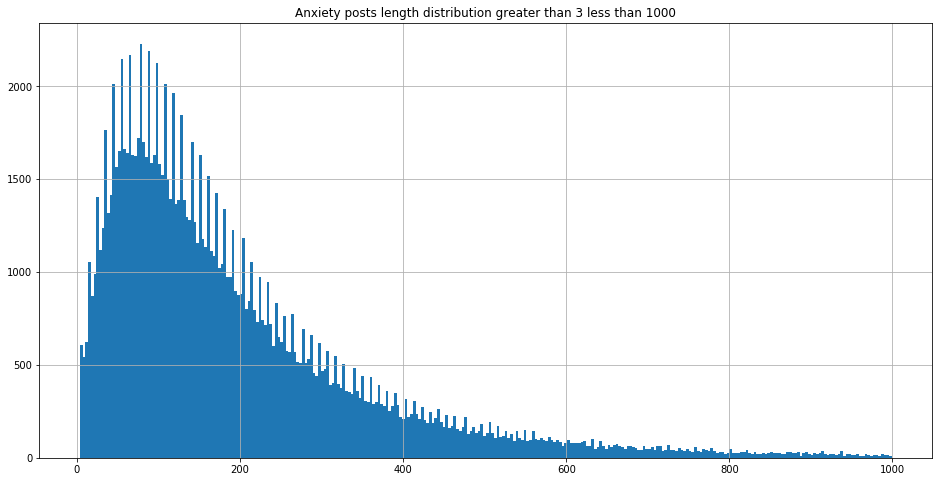

In [82]:
_ = a_submission_data[((a_submission_data.wordlen>3) & (a_submission_data.wordlen<1000) )]["wordlen"].hist(bins=300, figsize=(16,8))
_.set_title("Anxiety posts length distribution greater than 3 less than 1000")

Text(0.5,1,'Anxiety subreddit post length')

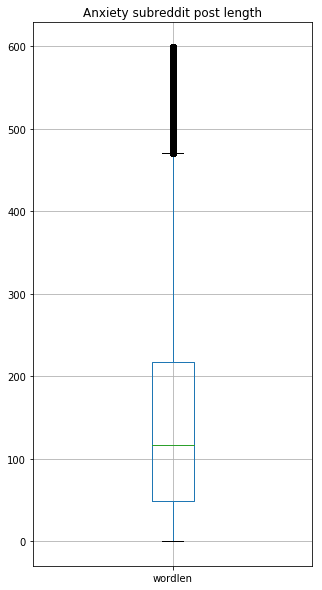

In [96]:
_ = a_submission_data[a_submission_data.wordlen<600].boxplot(column="wordlen", figsize=(5,10))
_.set_title("Anxiety subreddit post length")

Text(0.5,1,'Depression subreddit post length')

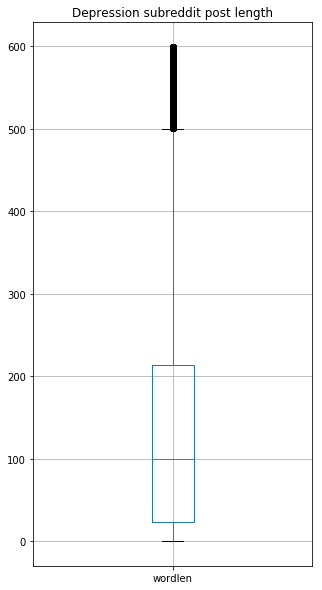

In [97]:
_ = d_submission_data[d_submission_data.wordlen<600].boxplot(column="wordlen", figsize=(5,10))
_.set_title("Depression subreddit post length")

Text(0.5,1,'Anxiety subreddit comment length')

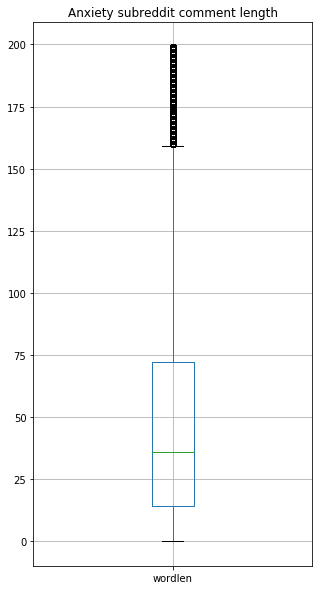

In [94]:
_ = a_comment_data[a_comment_data.wordlen<200].boxplot(column="wordlen", figsize=(5,10))
_.set_title("Anxiety subreddit comment length")

Text(0.5,1,'Depression subreddit comment length')

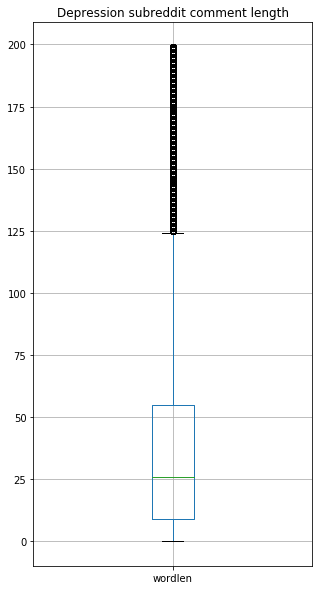

In [93]:
_ = d_comment_data[d_comment_data.wordlen<200].boxplot(column="wordlen", figsize=(5,10))
_.set_title("Depression subreddit comment length")

In [ ]:
print(a_submission_data[a_submission_data.wordlen<600].id.count())
print(d_submission_data[d_submission_data.wordlen<600].id.count())
print(a_comment_data[a_comment_data.wordlen<200].id.count())
print(d_comment_data[d_comment_data.wordlen<200].id.count())

In [150]:
#_d_comment_bodies = 
def trimbody(body):
    if isinstance(body, str):
        newbody = body.replace(".","")
        newbody = newbody.replace(",","")
        newbody = newbody.replace("!","")
        newbody = newbody.rstrip()
        newbody = newbody.lstrip()
        return newbody
    else:
        return body

_d_bodies = d_comment_data.body.apply(trimbody)
_d_posts = d_submission_data.selftext.apply(trimbody)
_a_bodies = a_comment_data.body.apply(trimbody)
_a_posts = a_submission_data.selftext.apply(trimbody)

In [ ]:
print(len(_d_bodies[_d_bodies.duplicated()]))
print(len(_d_posts[_d_posts.duplicated()]))
print(len(_a_bodies[_a_bodies.duplicated()]))
print(len(_a_posts[_a_posts.duplicated()]))

In [ ]:
print(_d_bodies.groupby(_d_bodies).count().nlargest(20))

In [ ]:
print(_d_posts.groupby(_d_posts).count().nlargest(20))


In [155]:
print(_a_bodies.groupby(_a_bodies).count().nlargest(20))

body
[deleted]             43940
[removed]              4873
Thank you              1814
Thanks                  774
Thank you :)            478
Yes                     399
Thank you so much       310
Thanks :)               303
thank you               202
:)                      187
Good luck               181
Congrats                160
&lt;3                   151
Congratulations         146
Same                    138
Me too                  120
Thank you for this      108
Yep                      98
You're welcome           98
thanks                   96
Name: body, dtype: int64


In [ ]:
_a_posts.groupby(_a_posts).count().nlargest(30)

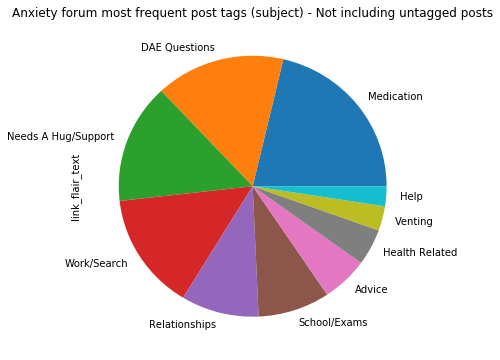

In [134]:


_=a_submission_data.groupby("link_flair_text")["link_flair_text"].count().nlargest(10).plot(kind="pie", title="Anxiety forum most frequent post tags (subject) - Not including untagged posts", figsize=(6,6))

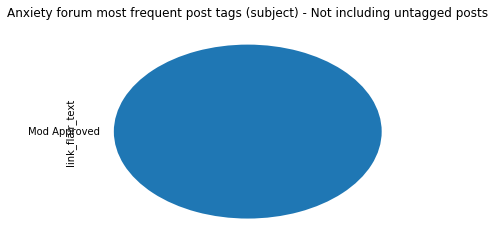

In [58]:
_=d_submission_data.groupby("link_flair_text")["link_flair_text"].count().nlargest(10).plot(kind="pie", title="Anxiety forum most frequent post tags (subject) - Not including untagged posts")

In [5]:
a_submission_data["month_year"] = a_submission_data["timestamp"].map(lambda x: 100*x.year + x.month)
d_submission_data["month_year"] = d_submission_data["timestamp"].map(lambda x: 100*x.year + x.month)
a_comment_data["month_year"] = a_comment_data["timestamp"].map(lambda x: 100*x.year + x.month)
d_comment_data["month_year"] = d_comment_data["timestamp"].map(lambda x: 100*x.year + x.month)

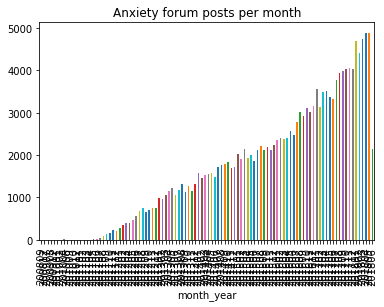

In [6]:
_=a_submission_data.groupby("month_year")["month_year"].count().plot(kind="bar", title="Anxiety forum posts per month")

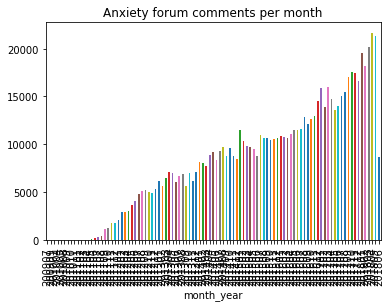

In [7]:
_=a_comment_data.groupby("month_year")["month_year"].count().plot(kind="bar", title="Anxiety forum comments per month")

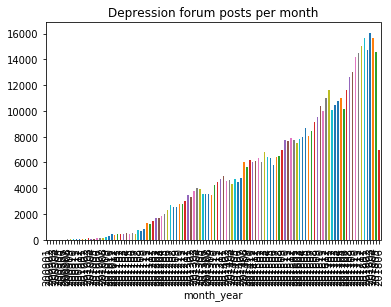

In [8]:
_=d_submission_data.groupby("month_year")["month_year"].count().plot(kind="bar", title="Depression forum posts per month")

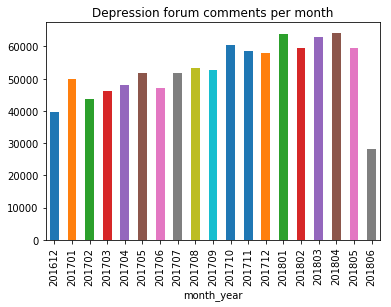

In [9]:
_=d_comment_data.groupby("month_year")["month_year"].count().plot(kind="bar", title="Depression forum comments per month")

In [10]:
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
import operator

In [28]:
drug_list=[]
with open("drug_selection.txt") as instream:
    for line in instream:
        drug = line.replace("\n","").replace("\xa0","")
        drug_list.append(drug)
print((drug_list))

['abilify', 'alprazolam', 'amitriptyline', 'aplenzin', 'aripiprazole', 'atenolol', 'ativan', 'budeprion', 'bupropion', 'buspar', 'buspirone', 'celexa', 'citalopram', 'clonazepam', 'clonidine', 'cymbalta', 'deplin', 'desvenlafaxine', 'desyrel', 'diazepam', 'doxepin', 'duloxetine', 'effexor', 'escitalopram', 'fetzima', 'fluoxetine', 'forfivo', 'gabapentin', 'hydroxyzine', 'lamotrigine', 'lexapro', 'librium', 'lorazepam', 'methylphenidate', 'mirtazapine', 'nortriptyline', 'olanzapine', 'oleptro', 'paroxetine', 'paxil', 'pristiq', 'propranolol', 'prozac', 'quetiapine', 'remeron', 'seroquel', 'sertraline', 'tenormin', 'tramadol', 'trazodone', 'trintellix', 'valium', 'venlafaxine', 'viibryd', 'vistaril', 'wellbutrin', 'xanax', 'zoloft', 'zyprexa']


In [34]:
a_topwords = {}
for r in a_submission_data[a_submission_data.link_flair_text=="Medication"]["selftext"]:
    if r!="" and type(r)!=float:
        for word in [i for i in word_tokenize(r.lower()) if i not in stop and len(i)>3]:
            if word in drug_list:
                if word not in a_topwords:
                    a_topwords[word] = 1
                else:
                    a_topwords[word] += 1
                

sorted_a_topwords = sorted(a_topwords.items(), key=operator.itemgetter(1), reverse=True)
medication_topwords_df = pd.DataFrame(sorted_a_topwords[0:25], columns=['word', 'count'])

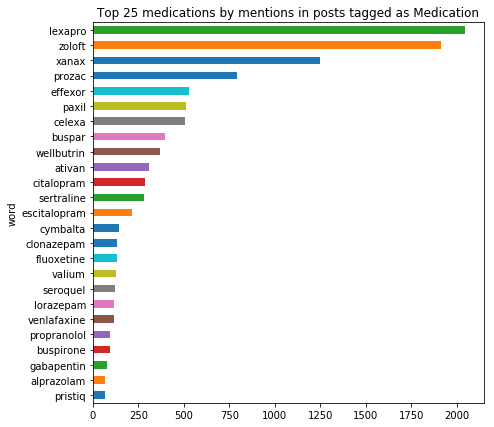

In [40]:
_=medication_topwords_df.groupby("word")["count"].mean().sort_values(ascending=True).plot(kind="barh", figsize=(7,7), title="Top 25 medications by mentions in posts tagged as Medication")

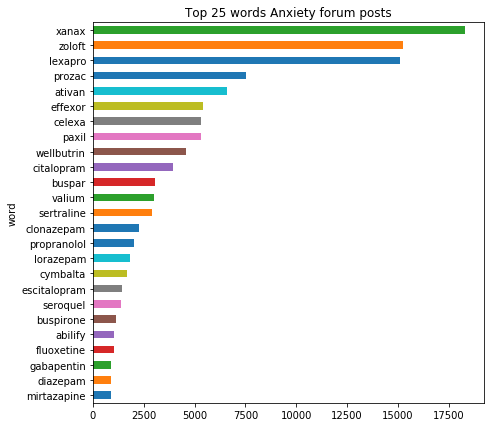

In [36]:
ac_topwords = {}
for r in a_submission_data["selftext"]:
    if r!="" and type(r)!=float:
        for word in [i for i in word_tokenize(r.lower()) if i not in stop and len(i)>3]:
            if word in drug_list:
                if word not in ac_topwords:
                    ac_topwords[word] = 1
                else:
                    ac_topwords[word] += 1
for r in a_comment_data["body"]:
    if r!="" and type(r)!=float:
        for word in [i for i in word_tokenize(r.lower()) if i not in stop and len(i)>3]:
            if word in drug_list:
                if word not in ac_topwords:
                    ac_topwords[word] = 1
                else:
                    ac_topwords[word] += 1
                

sorted_ac_topwords = sorted(ac_topwords.items(), key=operator.itemgetter(1), reverse=True)
a_topwords_df = pd.DataFrame(sorted_ac_topwords[0:25], columns=['word', 'count'])

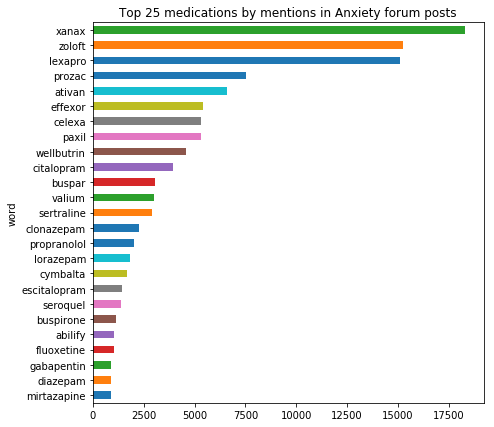

In [39]:
_=a_topwords_df.groupby("word")["count"].mean().sort_values(ascending=True).plot(kind="barh", figsize=(7,7), title="Top 25 medications by mentions in Anxiety forum posts")

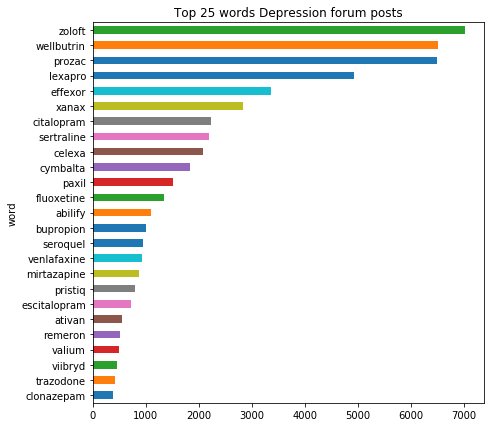

In [37]:
d_topwords = {}
for r in d_submission_data["selftext"]:
    if r!="" and type(r)!=float:
        for word in [i for i in word_tokenize(r.lower()) if i not in stop and len(i)>3]:
            if word in drug_list:
                if word not in d_topwords:
                    d_topwords[word] = 1
                else:
                    d_topwords[word] += 1
for r in d_comment_data["body"]:
    if r!="" and type(r)!=float:
        for word in [i for i in word_tokenize(r.lower()) if i not in stop and len(i)>3]:
            if word in drug_list:
                if word not in d_topwords:
                    d_topwords[word] = 1
                else:
                    d_topwords[word] += 1
                

sorted_d_topwords = sorted(d_topwords.items(), key=operator.itemgetter(1), reverse=True)
d_topwords_df = pd.DataFrame(sorted_d_topwords[0:25], columns=['word', 'count'])

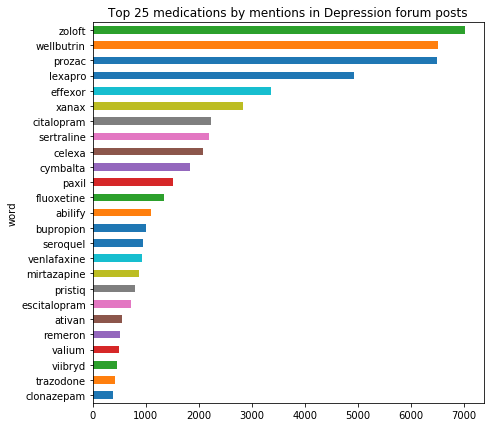

In [38]:
_=d_topwords_df.groupby("word")["count"].mean().sort_values(ascending=True).plot(kind="barh", figsize=(7,7), title="Top 25 medications by mentions in Depression forum posts")

In [ ]:
pd.set_option('display.max_colwidth', -1)
print(a_submission_data[a_submission_data.link_flair_text=="Medication"]["selftext"].head(100))


# Cleaning begins here

In [ ]:
def strlower(mystr):
    if isinstance(mystr, str):
        return mystr.lower()
    else:
        return mystr
    
print(len(a_submission_data[a_submission_data.selftext.apply(strlower)=="[deleted]"]))
print(len(a_submission_data[a_submission_data.selftext.apply(strlower)=="[removed]"]))
print(len(a_submission_data[a_submission_data.selftext.apply(strlower)=="deleted"]))
print(len(a_submission_data[a_submission_data.selftext.apply(strlower)=="removed"]))
print("\n")

#print(a_submission_data[a_submission_data.selftext.apply(strlower)=="[deleted]"].index)

a_submission_data = a_submission_data.drop(a_submission_data[a_submission_data.selftext.apply(strlower)=="[deleted]"].index)
a_submission_data = a_submission_data.drop(a_submission_data[a_submission_data.selftext.apply(strlower)=="[removed]"].index)
a_submission_data = a_submission_data.drop(a_submission_data[a_submission_data.selftext.apply(strlower)=="deleted"].index)
a_submission_data = a_submission_data.drop(a_submission_data[a_submission_data.selftext.apply(strlower)=="removed"].index)
print("\n")

print(len(a_submission_data[a_submission_data.selftext.apply(strlower)=="[deleted]"]))
print(len(a_submission_data[a_submission_data.selftext.apply(strlower)=="[removed]"]))
print(len(a_submission_data[a_submission_data.selftext.apply(strlower)=="deleted"]))
print(len(a_submission_data[a_submission_data.selftext.apply(strlower)=="removed"]))

In [ ]:
print(len(a_submission_data[a_submission_data.duplicated(subset=["selftext"])]))

a_submission_data.drop_duplicates(subset=["selftext"], keep='first', inplace=True)

print(len(a_submission_data[a_submission_data.duplicated(subset=["selftext"])]))

In [ ]:
print(len(d_submission_data[d_submission_data.selftext.apply(strlower)=="[deleted]"]))
print(len(d_submission_data[d_submission_data.selftext.apply(strlower)=="[removed]"]))
print(len(d_submission_data[d_submission_data.selftext.apply(strlower)=="deleted"]))
print(len(d_submission_data[d_submission_data.selftext.apply(strlower)=="removed"]))
print("\n")

#print(a_submission_data[a_submission_data.selftext.apply(strlower)=="[deleted]"].index)

d_submission_data = d_submission_data.drop(d_submission_data[d_submission_data.selftext.apply(strlower)=="[deleted]"].index)
d_submission_data = d_submission_data.drop(d_submission_data[d_submission_data.selftext.apply(strlower)=="[removed]"].index)
d_submission_data = d_submission_data.drop(d_submission_data[d_submission_data.selftext.apply(strlower)=="deleted"].index)
d_submission_data = d_submission_data.drop(d_submission_data[d_submission_data.selftext.apply(strlower)=="removed"].index)
print("\n")

print(len(d_submission_data[d_submission_data.selftext.apply(strlower)=="[deleted]"]))
print(len(d_submission_data[d_submission_data.selftext.apply(strlower)=="[removed]"]))
print(len(d_submission_data[d_submission_data.selftext.apply(strlower)=="deleted"]))
print(len(d_submission_data[d_submission_data.selftext.apply(strlower)=="removed"]))

In [ ]:
print(len(d_submission_data[d_submission_data.duplicated(subset=["selftext"])]))

d_submission_data.drop_duplicates(subset=["selftext"], keep='first', inplace=True)

print(len(d_submission_data[d_submission_data.duplicated(subset=["selftext"])]))

In [ ]:
print(len(a_comment_data[a_comment_data.body.apply(strlower)=="[deleted]"]))
print(len(a_comment_data[a_comment_data.body.apply(strlower)=="[removed]"]))
print(len(a_comment_data[a_comment_data.body.apply(strlower)=="deleted"]))
print(len(a_comment_data[a_comment_data.body.apply(strlower)=="removed"]))
print("\n")

#print(a_submission_data[a_submission_data.selftext.apply(strlower)=="[deleted]"].index)

a_comment_data = a_comment_data.drop(a_comment_data[a_comment_data.body.apply(strlower)=="[deleted]"].index)
a_comment_data = a_comment_data.drop(a_comment_data[a_comment_data.body.apply(strlower)=="[removed]"].index)
a_comment_data = a_comment_data.drop(a_comment_data[a_comment_data.body.apply(strlower)=="deleted"].index)
a_comment_data = a_comment_data.drop(a_comment_data[a_comment_data.body.apply(strlower)=="removed"].index)

print(len(a_comment_data[a_comment_data.body.apply(strlower)=="[deleted]"]))
print(len(a_comment_data[a_comment_data.body.apply(strlower)=="[removed]"]))
print(len(a_comment_data[a_comment_data.body.apply(strlower)=="deleted"]))
print(len(a_comment_data[a_comment_data.body.apply(strlower)=="removed"]))

In [ ]:
print(len(a_comment_data[a_comment_data.duplicated(subset=["body"])]))

a_comment_data.drop_duplicates(subset=["body"], keep='first', inplace=True)

print(len(a_comment_data[a_comment_data.duplicated(subset=["body"])]))

In [ ]:
print(len(d_comment_data[d_comment_data.body.apply(strlower)=="[deleted]"]))
print(len(d_comment_data[d_comment_data.body.apply(strlower)=="[removed]"]))
print(len(d_comment_data[d_comment_data.body.apply(strlower)=="deleted"]))
print(len(d_comment_data[d_comment_data.body.apply(strlower)=="removed"]))
print("\n")

#print(a_submission_data[a_submission_data.selftext.apply(strlower)=="[deleted]"].index)

d_comment_data = d_comment_data.drop(d_comment_data[d_comment_data.body.apply(strlower)=="[deleted]"].index)
d_comment_data = d_comment_data.drop(d_comment_data[d_comment_data.body.apply(strlower)=="[removed]"].index)
d_comment_data = d_comment_data.drop(d_comment_data[d_comment_data.body.apply(strlower)=="deleted"].index)
d_comment_data = d_comment_data.drop(d_comment_data[d_comment_data.body.apply(strlower)=="removed"].index)

print(len(d_comment_data[d_comment_data.body.apply(strlower)=="[deleted]"]))
print(len(d_comment_data[d_comment_data.body.apply(strlower)=="[removed]"]))
print(len(d_comment_data[d_comment_data.body.apply(strlower)=="deleted"]))
print(len(d_comment_data[d_comment_data.body.apply(strlower)=="removed"]))

In [ ]:
print(len(d_comment_data[d_comment_data.duplicated(subset=["body"])]))

d_comment_data.drop_duplicates(subset=["body"], keep='first', inplace=True)

print(len(d_comment_data[d_comment_data.duplicated(subset=["body"])]))

In [ ]:
print(len(a_comment_data[a_comment_data.wordlen<4]))
print(len(d_comment_data[d_comment_data.wordlen<4]))


a_comment_data = a_comment_data.drop(a_comment_data[a_comment_data.wordlen<4].index)
d_comment_data = d_comment_data.drop(d_comment_data[d_comment_data.wordlen<4].index)

print(len(a_comment_data[a_comment_data.wordlen<4]))
print(len(d_comment_data[d_comment_data.wordlen<4]))


In [ ]:
print(len(a_submission_data[a_submission_data.selftext.isnull()]))
print(len(d_submission_data[d_submission_data.selftext.isnull()]))
print(len(a_comment_data[a_comment_data.body.isnull()]))
print(len(d_comment_data[d_comment_data.body.isnull()]))

a_submission_data = a_submission_data.drop(a_submission_data[a_submission_data.selftext.isnull()].index)
d_submission_data = d_submission_data.drop(d_submission_data[d_submission_data.selftext.isnull()].index)
d_comment_data = d_comment_data.drop(d_comment_data[d_comment_data.body.isnull()].index)
a_comment_data = a_comment_data.drop(a_comment_data[a_comment_data.body.isnull()].index)

print(len(a_submission_data[a_submission_data.selftext.isnull()]))
print(len(d_submission_data[d_submission_data.selftext.isnull()]))
print(len(a_comment_data[a_comment_data.body.isnull()]))
print(len(d_comment_data[d_comment_data.body.isnull()]))

In [ ]:
def islastpunct(mystr):
    punct = set(string.punctuation)
    if isinstance(mystr, str):
        if mystr[-1] in punct:
            return mystr
        else:
            return mystr + "."
    else:
        return mystr

a_submission_data["body"] = a_submission_data.title.apply(islastpunct) + " " + a_submission_data.selftext
d_submission_data["body"] = d_submission_data.title.apply(islastpunct) + " " + d_submission_data.selftext

In [ ]:
d_submission_data

In [60]:
a_submission_data.to_csv("a_submissions_clean.csv", index=False, sep="|")
d_submission_data.to_csv("d_submissions_clean.csv", index=False, sep="|")
a_comment_data.to_csv("a_comments_clean.csv", index=False, sep="|")
d_comment_data.to_csv("d_comments_clean.csv", index=False, sep="|")

# After Cleaning

In [ ]:
a_submission_data = pd.read_csv('a_submissions_clean.csv', sep="|", dtype={"author": str, "created_utc": int, "full_link": str, "id": str, 
                                                            "link_flair_text":str, "num_comments":int, "score":int, 
                                                            "seltext":str,"title":str, "timestamp":str, "wordlen": float,"body": str }, parse_dates=["timestamp"])
d_submission_data = pd.read_csv('d_submissions_clean.csv',sep="|", dtype={"author": str, "created_utc": int, "full_link": str, "id": str, 
                                                            "link_flair_text":str, "num_comments":int, "score":int, 
                                                            "seltext":str,"title":str, "timestamp":str, "wordlen": float,"body": str, }, parse_dates=["timestamp"])
a_comment_data = pd.read_csv('a_comments_clean.csv',sep="|", dtype={"author": str, "body": str, "created_utc": int, "id": str, 
                                                            "link_id":str, "parent_id":str, "permalink":str, 
                                                            "score":int,"timestamp":str, "wordlen": float}, parse_dates=["timestamp"])
d_comment_data = pd.read_csv('d_comments_clean.csv',sep="|", dtype={"author": str, "body": str, "created_utc": int, "id": str, 
                                                            "link_id":str, "parent_id":str, "permalink":str, 
                                                           "score":int,"timestamp":str, "wordlen": float}, parse_dates=["timestamp"])


In [ ]:
a_submission_data["wordlen"] = a_submission_data.body.str.split().str.len()
a_comment_data["wordlen"] = a_comment_data.body.str.split().str.len()
d_submission_data["wordlen"] = d_submission_data.body.str.split().str.len()
d_comment_data["wordlen"] = d_comment_data.body.str.split().str.len()

In [ ]:
print("Forum")
print("Total Posts", len(a_submission_data.id))
print("Shortest post", a_submission_data.wordlen.min())
print("Longest post",a_submission_data.wordlen.max())
print("Mean length post",a_submission_data.wordlen.mean())
print("Median length post",a_submission_data.wordlen.median())
print("Mode length post",a_submission_data[a_submission_data.wordlen>1].wordlen.mode())

print("Total Comments", len(a_comment_data.id))
print("Shortest comment", a_comment_data.wordlen.min())
print("Longest comment",a_comment_data.wordlen.max())
print("Mean length comment",a_comment_data.wordlen.mean())
print("Median length comment",a_comment_data.wordlen.median())
print("Mode length comment",a_comment_data[a_comment_data.wordlen>1].wordlen.mode())

In [ ]:
a_submission_data.body

In [ ]:
a_comment_data